In [1]:
%pylab

Using matplotlib backend: <object object at 0x7ff8ec133a10>
Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
import h5py
from pycbc.inference import io,models
from pesummary.core.plots.bounded_1d_kde import bounded_1d_kde

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [4]:
def savage_dickey(hdfpath,par='amp330',prior_high=0.5,prior_low=0):
    '''
    Compute the Bayes Factor given a hdf file's path 
    '''
    f = io.loadfile(hdfpath,'r')
    pos = f.read_samples([par])
    pdf = bounded_1d_kde(pos[par], xlow=prior_low, xhigh=prior_high, method="Reflection") #PDF
    prior = 1/ (prior_high-prior_low) #uniform distribution
    f.close()
    bf = prior/pdf(0)
    return bf[0] #BF = prior(0) / posterior(0)

In [5]:
def extract_bf(path):
    f = h5py.File(path,'r')
    bf = f.attrs['log_evidence'] 
    f.close()
    return bf

In [6]:
bf330_0p5 = extract_bf('../github/posteriors/kerr/220_330/KERR-220_330-06MS.hdf')

In [7]:
bf330_0p9 = extract_bf('./condor8-prior0p9-330/result.hdf')
bf330_1 = extract_bf('./condor8-prior1-330/result.hdf')
bf330_2 = extract_bf('./condor8-prior2-330/result.hdf')

In [8]:
bf220 = extract_bf('../github/posteriors/kerr/220/KERR-220-06MS.hdf')
bf221 = extract_bf('../github/posteriors/kerr/220_221/KERR-220_221-06MS.hdf')

In [9]:
bflist =[]
prior = [0.5,0.9,1,2]
for bf_now in [bf330_0p5,bf330_0p9,bf330_1,bf330_2]:
    bflist.append(np.exp(bf_now - max(bf220,bf221)))

In [10]:
sd_bf330_0p5 = savage_dickey('../github/posteriors/kerr/220_330/KERR-220_330-06MS.hdf')

In [11]:
sd_bf330_0p5

46.81292702885299

In [12]:
sd_bf330_0p9 = savage_dickey('./condor8-prior0p9-330/result.hdf',par='amp330',prior_high=0.9)
sd_bf330_1 = savage_dickey('./condor8-prior1-330/result.hdf',par='amp330',prior_high=1)
sd_bf330_2 = savage_dickey('./condor8-prior2-330/result.hdf',par='amp330',prior_high=2)

In [13]:
sd_bflist = [sd_bf330_0p5,sd_bf330_0p9,sd_bf330_1,sd_bf330_2]

In [14]:
x = np.linspace(0.5,2,100)
y = 0.5/x*bflist[0]

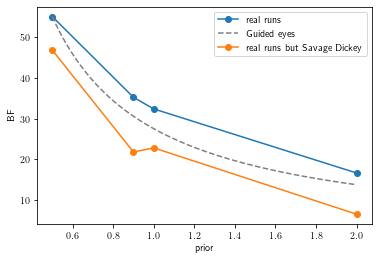

In [15]:
plt.plot(prior,bflist,marker='o',label='real runs')
plt.plot(x,y,ls='--',color='grey',label='Guided eyes')
plt.plot(prior,sd_bflist,marker='o',label='real runs but Savage Dickey')
plt.xlabel('prior')
plt.ylabel('BF')
plt.legend()

In [17]:
prior

[0.5, 0.9, 1, 2]

In [16]:
bflist

[55.040374070835256, 35.22682335861611, 32.36931815641431, 16.638611935825722]